In [6]:
import matplotlib.pyplot as plt
import numpy as np

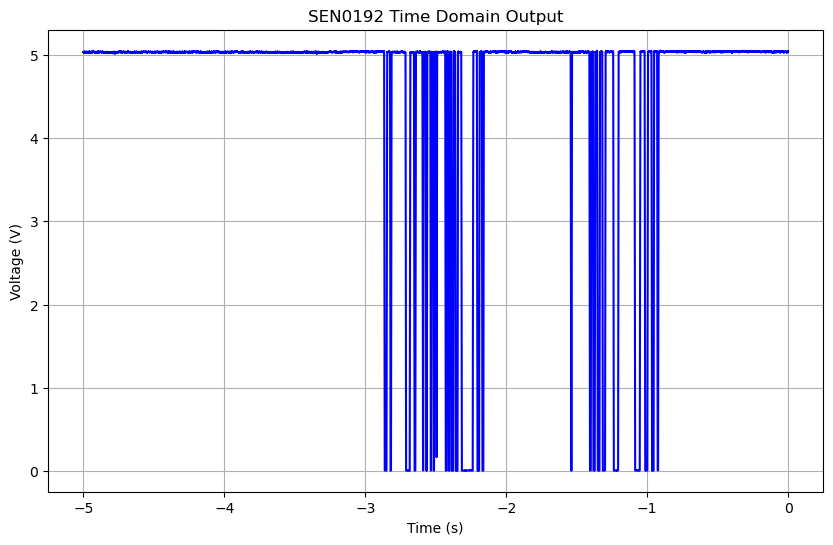

In [16]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PicoScopeSen0192Data.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('SEN0192 Time Domain Output')
plt.grid(True)

plt.savefig('SEN0192_time_domain.png')
# Show the plot
plt.show()


# Frequency Spectrum of above data

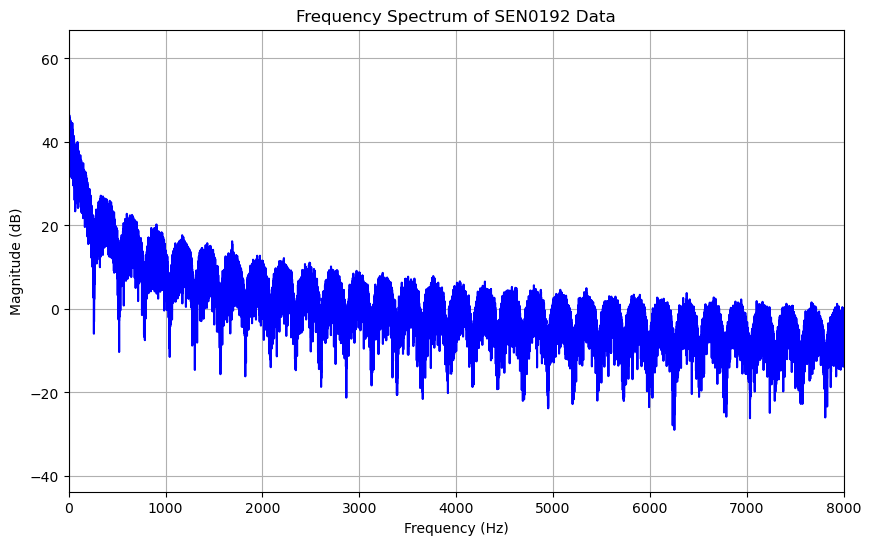

In [17]:
# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 66700

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Calculate the magnitude of the FFT result in dB
fft_magnitude_db = 10 * np.log10(fft_magnitude)

# Plot the frequency spectrum in dB scale
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude_db[:len(fft_magnitude_db) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.ylim(-40, 60)  # Adjust the y-axis limits as needed
plt.xlim(0, 8000)
plt.title('Frequency Spectrum of SEN0192 Data')
plt.grid(True)

plt.savefig('SEN0192_frequency_spectrum.png')
# Show the plot
plt.show()

